In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [75]:
df = pd.read_excel('titanic.xls','titanic', index_col=None, na_values=['NA']) #read excel sheet to dataframe

In [76]:
df.head() #show the first 5 records

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [77]:
df.drop(['ticket','cabin','boat','body'], axis=1).head(10) #drop some columns and show the first 10 record

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,26.5500,S,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,77.9583,S,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,0.0000,S,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,51.4792,S,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,49.5042,C,"Montevideo, Uruguay"


In [78]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [79]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<AxesSubplot:xlabel='sex', ylabel='count'>

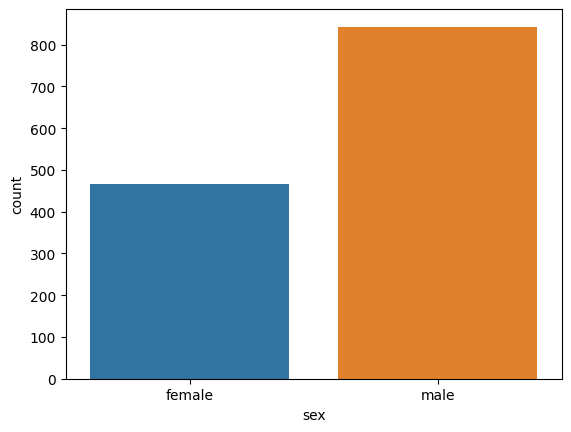

In [80]:
sns.countplot(x='sex',data=df) #No. of male vs. female

<AxesSubplot:>

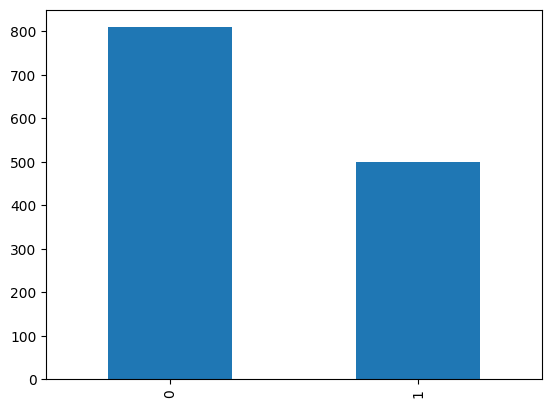

In [81]:
pd.value_counts(df['survived']).plot.bar() #No. of survivals (0 = deceased)

In [82]:
df['survived'].mean() #survival rate (%)

0.3819709702062643

<AxesSubplot:xlabel='sex', ylabel='count'>

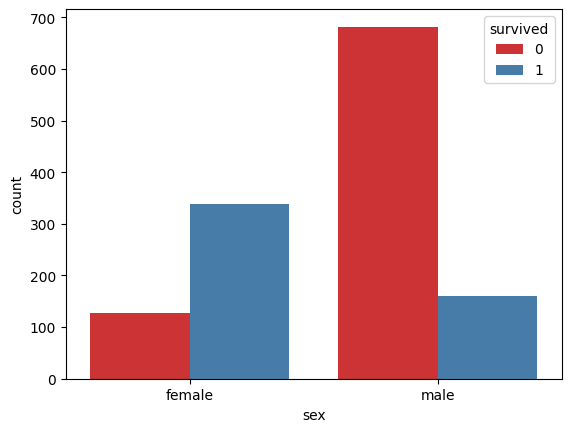

In [83]:
sns.countplot(x='sex', hue = 'survived', data = df,
palette = 'Set1')

In [84]:
df.groupby(['sex']).mean()

,pclass,survived,age,sibsp,parch,fare,body
sex,,,,,,,
female,2.154506,0.727468,28.687071,0.652361,0.633047,46.198097,166.62500
male,2.372479,0.190985,30.585233,0.413998,0.247924,26.154601,160.39823


In [85]:
df.groupby(['sex','pclass']).mean() #survival rate by gender and class

survived        age     sibsp     parch        fare        body
sex    pclass                                                                 
female 1       0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       2       0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       3       0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
male   1       0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
       2       0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
       3       0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

In [86]:
df[df['age']<18].groupby(['sex','pclass']).mean() #survival rate for those under 18

survived        age     sibsp     parch        fare   body
sex    pclass                                                            
female 1       0.875000  14.125000  0.500000  0.875000  104.083337    NaN
       2       1.000000   8.273150  0.666667  1.166667   27.998844    NaN
       3       0.543478   8.416667  1.456522  1.043478   18.284148  328.0
male   1       0.857143   9.845243  0.571429  1.714286  129.752371    NaN
       2       0.733333   6.222220  0.600000  0.933333   31.750280    NaN
       3       0.233333   9.838888  1.966667  1.016667   21.677570   65.5

### KDE Plot
A Kernel Density Estimate (KDE) Plot is used to plot the distribution of continuous data.

<AxesSubplot:xlabel='age', ylabel='Density'>

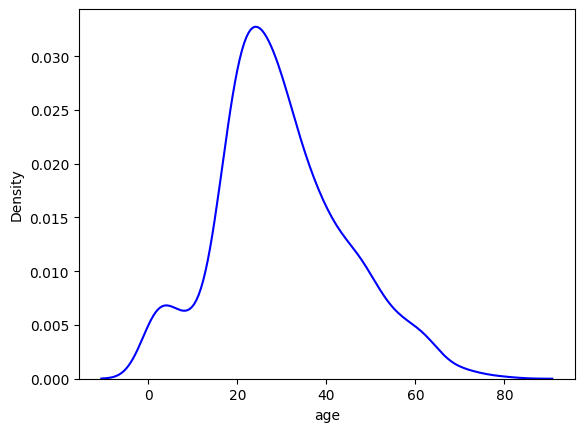

In [87]:
sns.kdeplot(x = 'age' , data = df , color = 'blue')

The peak of the above graph is in between 20 and 40 so we can conclude that most passengers were between the ages of 20 and 40.

### Distribution plot
A Distribution plot is similar to a KDE plot. It is used to plot the distribution of continuous data.

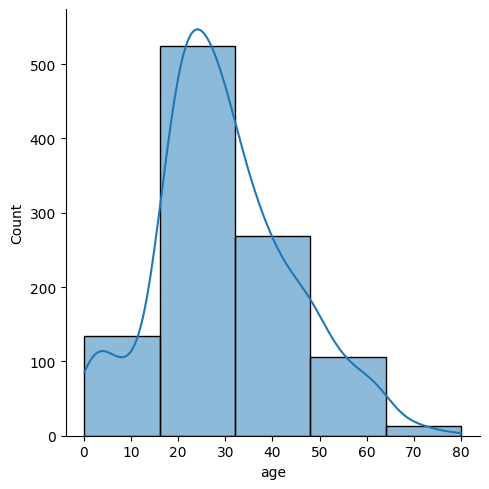

In [88]:
sns.displot(x = 'age',kde=True,bins = 5 , data =df)

The plot above tells us that most people onboard the titanic were in their mid-twenties.

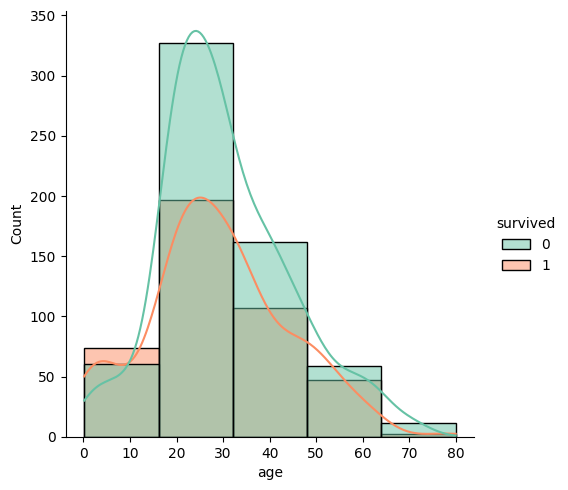

In [89]:
sns.displot(x ='age',kde=True,bins = 5 ,
hue = df['survived'] , palette = 'Set2', data=df)

Most of the surviving passengers were in their high-twenties.

In [90]:
sns.get_dataset_names()    #seaborn's built-in datasets!!!

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [91]:
dfsns = sns.load_dataset('titanic')
dfsns.head(8)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


## Studies unrelated to Titanic

In [92]:
df_iris = sns.load_dataset('iris')
df_iris.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

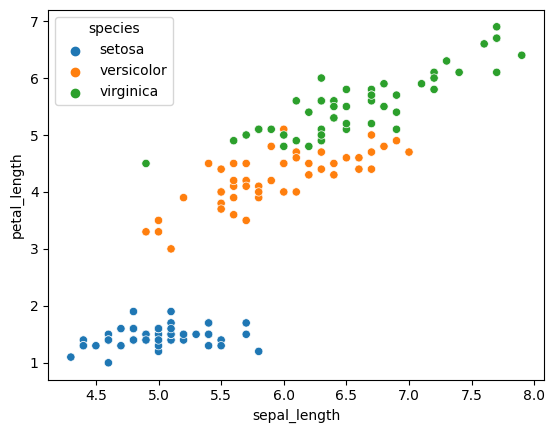

In [93]:
sns.scatterplot(x='sepal_length', y ='petal_length' ,
data = df_iris , hue = 'species')

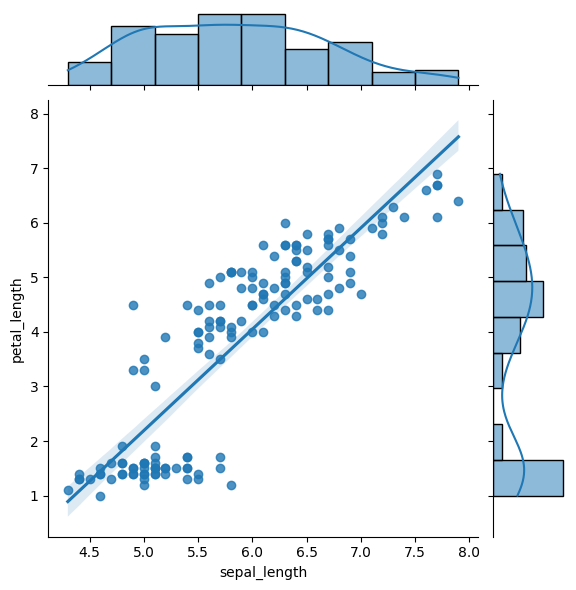

In [95]:
sns.jointplot(x='sepal_length' , y ='petal_length',
data = df_iris , kind = 'reg')

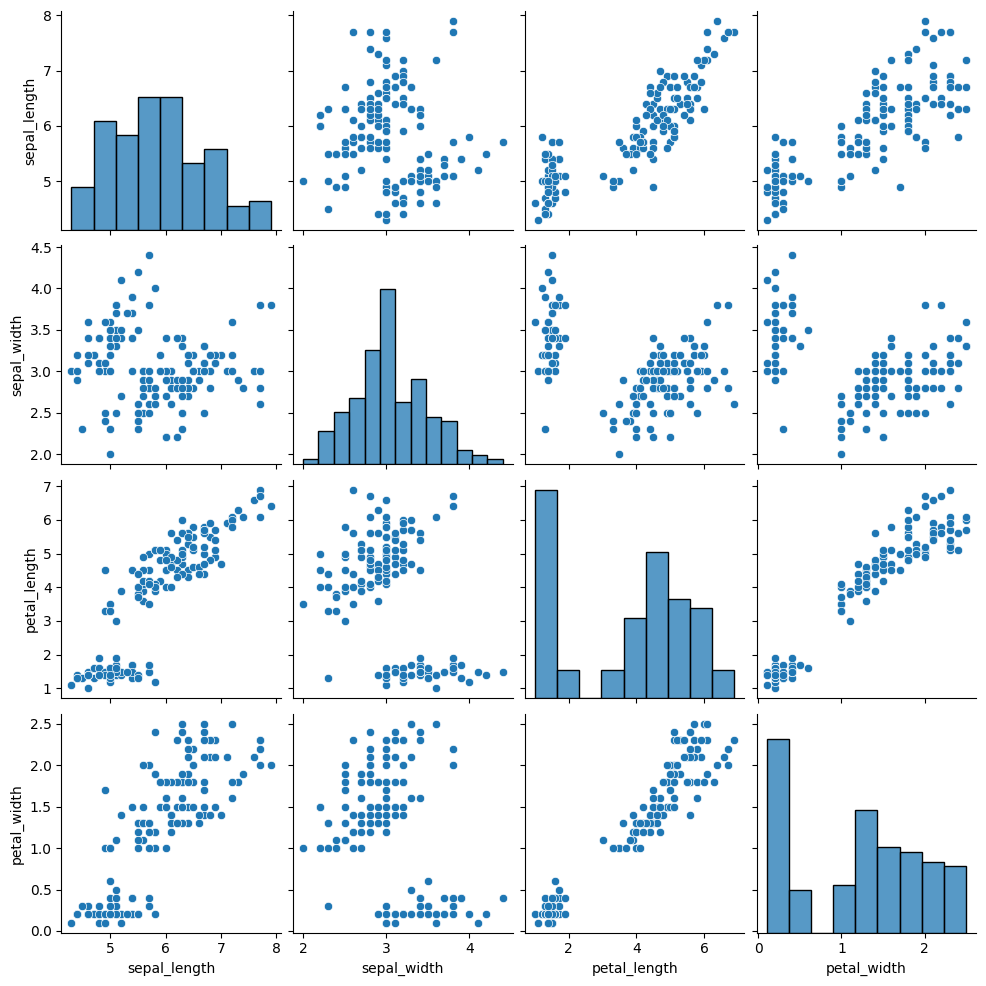

In [97]:
sns.pairplot(df_iris)

<AxesSubplot:>

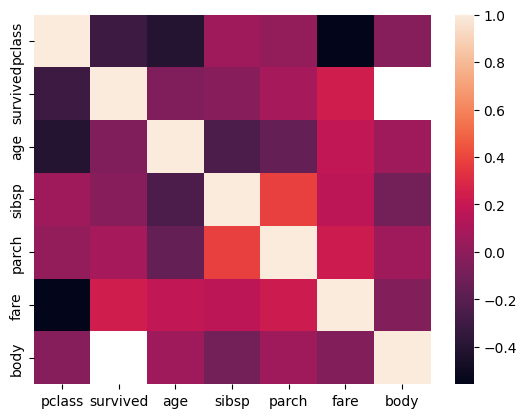

In [100]:
corr = df.corr()
sns.heatmap(corr)

<AxesSubplot:>

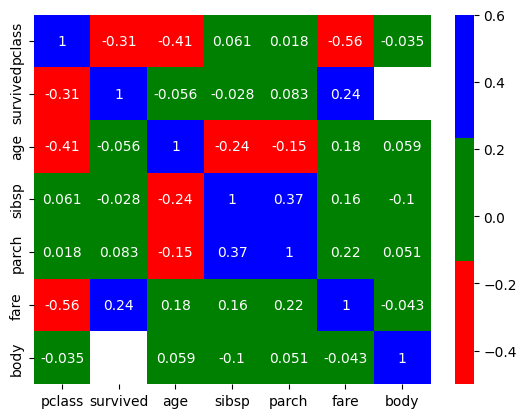

In [101]:
sns.heatmap(corr, cmap=['red','green','blue'],
vmin = -.5 , vmax = 0.6,annot = True)